In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import gym
import torch.nn as nn
import torch.nn.functional as F 
import agents

In [5]:
from importlib import reload
reload(agents)

<module 'agents' from '/home/nicola/Nicola_unipd/MasterThesis/Policy-based-RL/agents.py'>

In [6]:
def play_episode(agent, env, return_states=False, greedy=True):
    # Reset environment (start of an episode)
    state = env.reset()
    rewards = []
    log_probs = []
    done = []
    
    if return_states:
        states = [state]
    steps = 0
    while True:
        #state_ohe = np.zeros(env.observation_space.n).astype(float)
        #state_ohe[state] = 1.
        #print('state_ohe: ', state_ohe)
        state = np.array([state])
        action, log_prob = agent.get_action(state, return_log = True, greedy=greedy)
        new_state, reward, terminal, info = env.step(action) # gym standard step's output
        if return_states:
            states.append(new_state)
            
        #if terminal:
            #print("reward = %d - terminal = "%(reward), terminal)
            #print("Additional info ", info)
        #    if 'TimeLimit.truncated' not in info and reward !=1:
                # -1 if falls in a hole
        #        reward = -1
        #    elif 'TimeLimit.truncated' in info:
                # 0 if the episode ends for time truncation
        #        reward = 0
        #else:
        #    reward = -0.01
            
        rewards.append(reward)
        log_probs.append(log_prob)
        done.append(terminal)
        
        if terminal:
            break
            
        state = new_state
       
    rewards = np.array(rewards)
    log_probs = np.array(log_probs)
    done = np.array(done)
    
    if return_states:
        return rewards, log_probs, np.array(states), done
    else:
        return rewards, log_probs, done

In [7]:
def train_frozenlake(n_episodes = 100, lr = 0.01, gamma = 0.99, greedy=False):
    # Create environment
    env = gym.make("FrozenLake-v0", is_slippery=False)
    observation_space = env.observation_space.n
    action_space = env.action_space.n
    # Init agent
    agent = agents.DiscretePolicyGrad(observation_space, action_space, lr, gamma, project_dim=16)
    performance = []
    losses = []
    for e in range(n_episodes):
        #print("\nEpisode %d"%(e+1))
        rewards, log_probs, _ = play_episode(agent, env, greedy=greedy)
        #print('play_episode executed')
        performance.append(np.sum(rewards))
        if (e+1)%10 == 0:
            print("Episode %d - reward: %.2f"%(e+1, np.mean(performance[-10:])))
        
        #print("rewards: ", rewards)
        #print("log_probs: ", log_probs)
        loss = agent.update(rewards, log_probs)
        #print('update loss executed')
        losses.append(loss)
    return agent, np.array(performance), np.array(losses)

In [8]:
%%time
trained_agentPG, cumulative_rewardPG, lossesPG = train_frozenlake(n_episodes = 500, lr=0.01, gamma=0.98)

Episode 10 - reward: 0.00
Episode 20 - reward: 0.00
Episode 30 - reward: 0.00
Episode 40 - reward: 0.00
Episode 50 - reward: 0.00
Episode 60 - reward: 0.10
Episode 70 - reward: 0.00
Episode 80 - reward: 0.10
Episode 90 - reward: 0.10
Episode 100 - reward: 0.00
Episode 110 - reward: 0.00
Episode 120 - reward: 0.00
Episode 130 - reward: 0.00
Episode 140 - reward: 0.00
Episode 150 - reward: 0.00
Episode 160 - reward: 0.00
Episode 170 - reward: 0.00
Episode 180 - reward: 0.00
Episode 190 - reward: 0.00
Episode 200 - reward: 0.00
Episode 210 - reward: 0.00
Episode 220 - reward: 0.00
Episode 230 - reward: 0.00
Episode 240 - reward: 0.00
Episode 250 - reward: 0.00
Episode 260 - reward: 0.00
Episode 270 - reward: 0.00
Episode 280 - reward: 0.00
Episode 290 - reward: 0.00
Episode 300 - reward: 0.00
Episode 310 - reward: 0.00
Episode 320 - reward: 0.00
Episode 330 - reward: 0.00
Episode 340 - reward: 0.00
Episode 350 - reward: 0.00
Episode 360 - reward: 0.00
Episode 370 - reward: 0.00
Episode 38

In [11]:
x = torch.LongTensor(np.arange(16))
trained_agentPG.net.embedding(x)

tensor([[-3.5470e-01, -1.9979e-01,  1.1565e+00,  1.5152e+00,  2.5656e-03,
          1.0172e+00, -6.4846e-01,  2.2962e-01,  5.8782e-01,  7.9868e-01,
         -2.7489e-01,  3.0223e-01,  1.5526e+00,  1.2306e-01,  1.1653e-01,
         -4.8130e-01],
        [ 1.6582e+00,  9.1635e-01,  1.0403e+00, -1.2568e-01,  1.0465e+00,
          4.4177e-01, -1.7290e+00, -3.9658e-01, -1.4386e+00,  4.2161e-01,
          3.6145e-01,  1.3581e+00, -1.0352e+00, -7.1756e-01,  1.3381e+00,
          1.0454e-01],
        [-1.6902e-01, -1.0568e+00,  7.3692e-01,  6.9599e-01,  4.7044e-01,
         -2.0022e-03,  2.0534e+00,  1.2293e+00,  2.0004e-01, -3.2229e-02,
         -3.5611e-01,  4.9370e-02,  7.3964e-01,  1.3533e-02, -1.4123e+00,
         -6.2629e-01],
        [ 1.4215e+00,  1.0468e+00, -7.8621e-01,  4.1528e-01,  3.6743e-01,
          1.6197e+00, -2.3514e+00, -8.1951e-01, -5.4692e-01, -8.5742e-01,
          1.1045e+00,  3.3944e-01, -1.1813e+00,  1.0665e+00, -1.2799e-02,
         -8.4203e-01],
        [-4.2867e-01

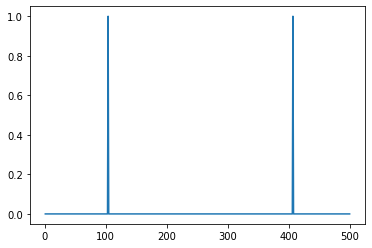

In [11]:
episodes = np.arange(1,len(cumulative_rewardPG)+1)
plt.plot(episodes, cumulative_rewardPG)
plt.show()

In [12]:
MAX_ITERATIONS = 100
 
env = gym.make("FrozenLake-v0", is_slippery=False)
state = env.reset()
env.render()
for i in range(MAX_ITERATIONS):
    state = np.array([state])
    action = trained_agentPG.get_action(state, return_log = False, greedy=False)
    new_state, reward, done, info = env.step(action)
    env.render()
    state = new_state
    if done:
        break


SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH

In [243]:
g = 0.99
n_sample = 10
dr = np.array([g**i for i in range(n_sample)])*(-0.01)
dr = np.concatenate((dr,[-1*g**n_sample]))
dr

array([-0.01      , -0.0099    , -0.009801  , -0.00970299, -0.00960596,
       -0.0095099 , -0.0094148 , -0.00932065, -0.00922745, -0.00913517,
       -0.90438208])

In [244]:
csum = np.cumsum(dr[::-1])[::-1]
print(csum)

[-1.         -0.99       -0.9801     -0.970299   -0.96059601 -0.95099005
 -0.94148015 -0.93206535 -0.92274469 -0.91351725 -0.90438208]


# With entropy regularization

In [4]:
def play_episode_ent(agent, env, return_states=False, greedy=True):
    # Reset environment (start of an episode)
    state = env.reset()
    rewards = []
    log_probs = []
    distributions = []
    done = []
    
    if return_states:
        states = [state]
        
    steps = 0
    while True:
        state = np.array([state])
        action, log_prob, prob_distr = agent.get_action(state, return_log = True, greedy=greedy)
        new_state, reward, terminal, info = env.step(action) # gym standard step's output
        
        if return_states:
            states.append(new_state)
            
        #if terminal:
            #print("reward = %d - terminal = "%(reward), terminal)
            #print("Additional info ", info)
        #    if 'TimeLimit.truncated' not in info and reward !=1:
                # -1 if falls in a hole
        #        reward = -1
        #    elif 'TimeLimit.truncated' in info:
                # 0 if the episode ends for time truncation
        #        reward = 0
        #else:
        #    reward = -0.01
            
        rewards.append(reward)
        log_probs.append(log_prob)
        distributions.append(prob_distr)
        done.append(terminal)
        
        if terminal:
            break
            
        state = new_state
       
    rewards = np.array(rewards)
    log_probs = np.array(log_probs)
    #distributions = np.array(distributions)
    done = np.array(done)
    
    if return_states:
        return rewards, log_probs, np.array(states), distributions, done
    else:
        return rewards, log_probs, distributions, done

In [9]:
def train_frozenlake_entropy(n_episodes = 100, lr = 0.01, gamma = 0.98, H=1e-3, greedy=False):
    # Create environment
    env = gym.make("FrozenLake-v0")
    observation_space = env.observation_space.n
    action_space = env.action_space.n
    # Init agent
    agent = agents.DiscretePolicyGradEnt(observation_space, action_space, lr, gamma, H)
    performance = []
    losses = []
    steps_log = []
    for e in range(n_episodes):
        rewards, log_probs, distributions, _ = play_episode_ent(agent, env, greedy=greedy)
        steps_log.append(len(rewards))
        performance.append(np.sum(rewards))
        if (e+1)%10 == 0:
            print("Episode %d - reward: %.2f"%(e+1, np.mean(performance[-10:])))
        
        loss = agent.update(rewards, log_probs, distributions)
        losses.append(loss)
    return agent, np.array(performance), np.array(losses), np.array(steps_log)

In [11]:
trained_agent_ent, perf, loss, steps = train_frozenlake_entropy(n_episodes=500, H=0.1, gamma=0.9)

Episode 10 - reward: 0.10
Episode 20 - reward: 0.00
Episode 30 - reward: 0.00
Episode 40 - reward: 0.00
Episode 50 - reward: 0.00
Episode 60 - reward: 0.00
Episode 70 - reward: 0.00
Episode 80 - reward: 0.00
Episode 90 - reward: 0.00
Episode 100 - reward: 0.00
Episode 110 - reward: 0.10
Episode 120 - reward: 0.00
Episode 130 - reward: 0.10
Episode 140 - reward: 0.00
Episode 150 - reward: 0.00
Episode 160 - reward: 0.00
Episode 170 - reward: 0.00
Episode 180 - reward: 0.10
Episode 190 - reward: 0.00
Episode 200 - reward: 0.00
Episode 210 - reward: 0.00
Episode 220 - reward: 0.00
Episode 230 - reward: 0.00
Episode 240 - reward: 0.00
Episode 250 - reward: 0.00
Episode 260 - reward: 0.00
Episode 270 - reward: 0.10
Episode 280 - reward: 0.00
Episode 290 - reward: 0.00
Episode 300 - reward: 0.10
Episode 310 - reward: 0.00
Episode 320 - reward: 0.00
Episode 330 - reward: 0.00
Episode 340 - reward: 0.00
Episode 350 - reward: 0.00
Episode 360 - reward: 0.00
Episode 370 - reward: 0.10
Episode 38

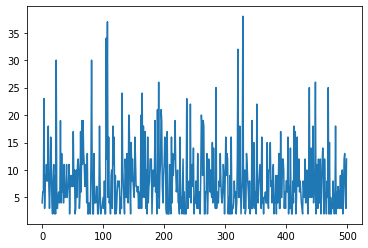

In [12]:
episodes = np.arange(len(steps))
plt.plot(episodes, steps)

In [14]:
MAX_ITERATIONS = 100
 
env = gym.make("FrozenLake-v0", is_slippery=False)
state = env.reset()
env.render()
for i in range(MAX_ITERATIONS):
    state = np.array([state])
    action = trained_agent_ent.get_action(state, return_log = False, greedy=False)
    new_state, reward, done, info = env.step(action)
    env.render()
    state = new_state
    if done:
        break


SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


# What an agent should learn

In [16]:
action_seq = ['Right','Right','Down','Down','Down','Right']
action_map = {'Left':0, 'Down':1, 'Right':2, 'Up':3}

In [17]:
MAX_ITERATIONS = 6
 
env = gym.make("FrozenLake-v0", is_slippery=False)
state = env.reset()
env.render()
rewards = []
for i in range(MAX_ITERATIONS):
    state = np.array([state])
    #action = trained_agent_ent.get_action(state, return_log = False, greedy=False)
    action = action_map[action_seq[i]]
    new_state, reward, done, info = env.step(action)
    env.render()
    state = new_state
    
    if done:
        print("Original reward = %d - terminal = "%(reward), done)
        print("Additional info ", info)
        if 'TimeLimit.truncated' not in info and reward !=1:
            # -1 if falls in a hole
            reward = -1
        elif 'TimeLimit.truncated' in info:
            # 0 if the episode ends for time truncation
            reward = 0
        print("Given reward = %d - terminal = "%(reward), done)
    else:
        reward = -0.01

    rewards.append(reward)
        
        
    if done:
        break


SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Original reward = 1 - terminal =  True
Additional info  {'prob': 1.0}
Given reward = 1 - terminal =  True
